# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [1]:
import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [2]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free"],
            "api_type": "together"
        },
    ),
    # "timeout": 120,
    # "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [4]:
# # Intermediate results will be saved in this directory COMPRESS MODE
# work_dir = "../report"
# os.makedirs(work_dir, exist_ok=True)

# assistant = SingleAssistantShadow(
#     "Expert_Investor",
#     llm_config,
#     max_consecutive_auto_reply=None,
#     human_input_mode="TERMINATE",
#     compress_config={
#         "mode": "COMPRESS",
#         "trigger_count": 600, # set this to a large number for less frequent compression
#         "verbose": True, # to allow printing of compression information: contex before and after compression
#         "leave_last_n": 2,
#     }
# )

# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

In [9]:
company = "Microsoft"
fyear = "2023"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 50 and 150 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on Microsoft's 2023 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 50 and 150 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

<think>

Alright, so the user wants me to write an annual report based on Microsoft's 2023 10-K report and format it into a PDF. They provided specific instructions, so I need to make sure I follow each step carefully.

First, I should outline my working plan. I'll start by understanding the structure of the 10-K report. It us

KeyboardInterrupt: 

The Rest Cells are optional, simply used to show the generated PDF

In [7]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 2.9 MB/s eta 0:00:0000:0100:01


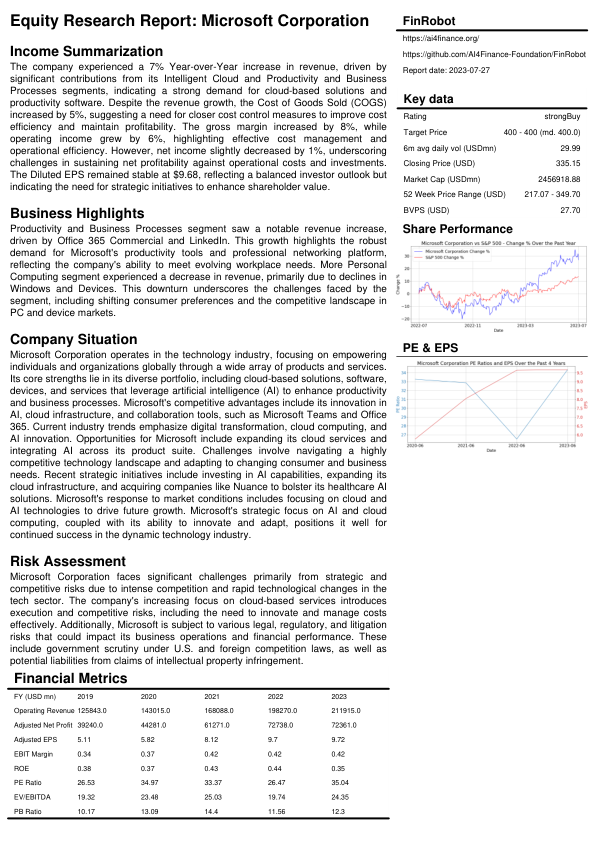

In [8]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/Microsoft_Annual_Report_2023.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)